# Task 1-Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [3]:
#identifying the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# find the measures of central tendency and dispersion
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# finding whether there are any null values in the data
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

from the above data it is clear that there are no null values

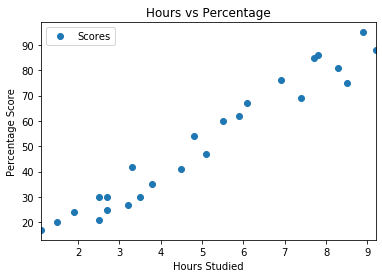

In [7]:
# visulaising the results using the scatter plots and linear regressio line
dataset.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

from the above graph,it is visible that a positive relation ship exists between the number of hours studied to the percentage score.

### Preparing the Data to train the model

In [8]:
# lets us spit the data into independent and the target variable
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [9]:
# reshape the data
X = X.reshape(-1,1)
y=y.reshape(-1,1)

In [10]:
# split the data into training and the test dataset
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Implementing the Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

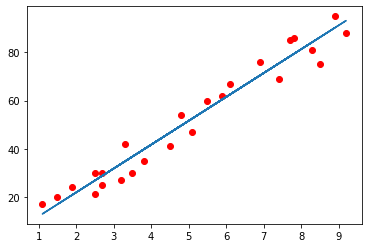

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line);
plt.show()

### Making the Predictions from the Test dataset

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
#finding the percentage score for 9.25 study hours
hours = 9.25
own_pred =regressor.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


### Evaluating the Regression Model

##### Use the Mean Absolute error or Mean Squared Error or RMSE to evaluate the performance of the trained model.

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
mae=mean_absolute_error(y_test,y_pred)

In [19]:
mae

4.183859899002975

In [20]:
mse=mean_squared_error(y_test,y_pred)

In [21]:
mse

21.5987693072174

In [22]:
rmse=np.sqrt(mse)

In [23]:
print(rmse)

4.6474476121003665


##### from the above metrics,it is clearly evident that Simple linear regression is the best fit for the given data.